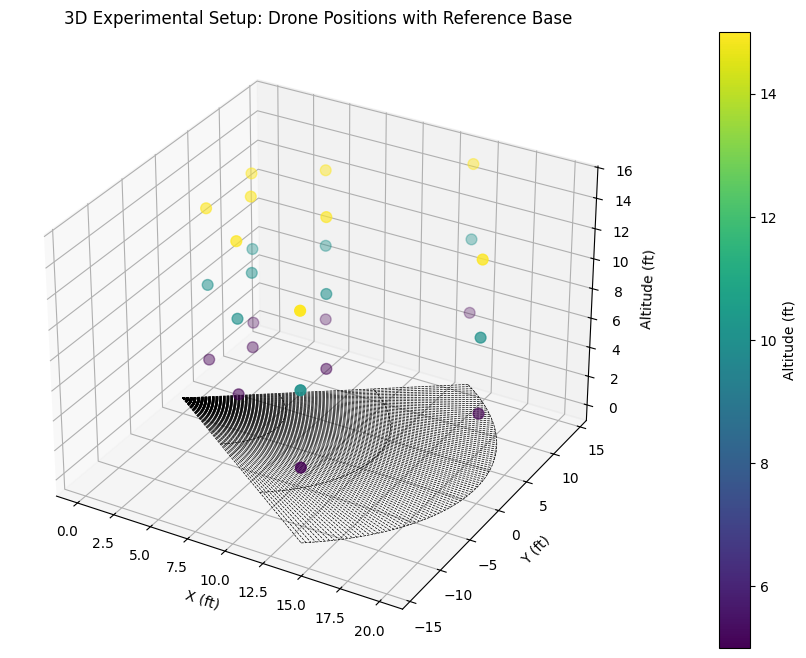

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Setup
distances = [5, 10, 20]
angles_deg = [-45, 0, 45]
altitudes = [5, 10, 15]

# Reference grid base (semicircle in XY plane)
theta_base = np.linspace(-45, 45, 100)
r_base = np.linspace(0, 20, 4)
theta_grid, r_grid = np.meshgrid(np.deg2rad(theta_base), r_base)
x_base = r_grid * np.cos(theta_grid)
y_base = r_grid * np.sin(theta_grid)
z_base = np.zeros_like(x_base)

# Data points (X, Y from polar, Z = altitude)
x_vals, y_vals, z_vals = [], [], []
for r in distances:
    for theta_deg in angles_deg:
        theta_rad = np.deg2rad(theta_deg)
        for z in altitudes:
            x = r * np.cos(theta_rad)
            y = r * np.sin(theta_rad)
            x_vals.append(x)
            y_vals.append(y)
            z_vals.append(z)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot reference base grid
for i in range(len(r_base)):
    ax.plot(x_base[i], y_base[i], z_base[i], 'k--', linewidth=0.5)
for j in range(len(theta_base)):
    ax.plot(x_base[:, j], y_base[:, j], z_base[:, j], 'k--', linewidth=0.5)

# Plot data points
sc = ax.scatter(x_vals, y_vals, z_vals, c=z_vals, cmap='viridis', s=60)

# Labels and formatting
ax.set_xlabel("X (ft)")
ax.set_ylabel("Y (ft)")
ax.set_zlabel("Altitude (ft)")
ax.set_title("3D Experimental Setup: Drone Positions with Reference Base")

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Altitude (ft)')

plt.show()


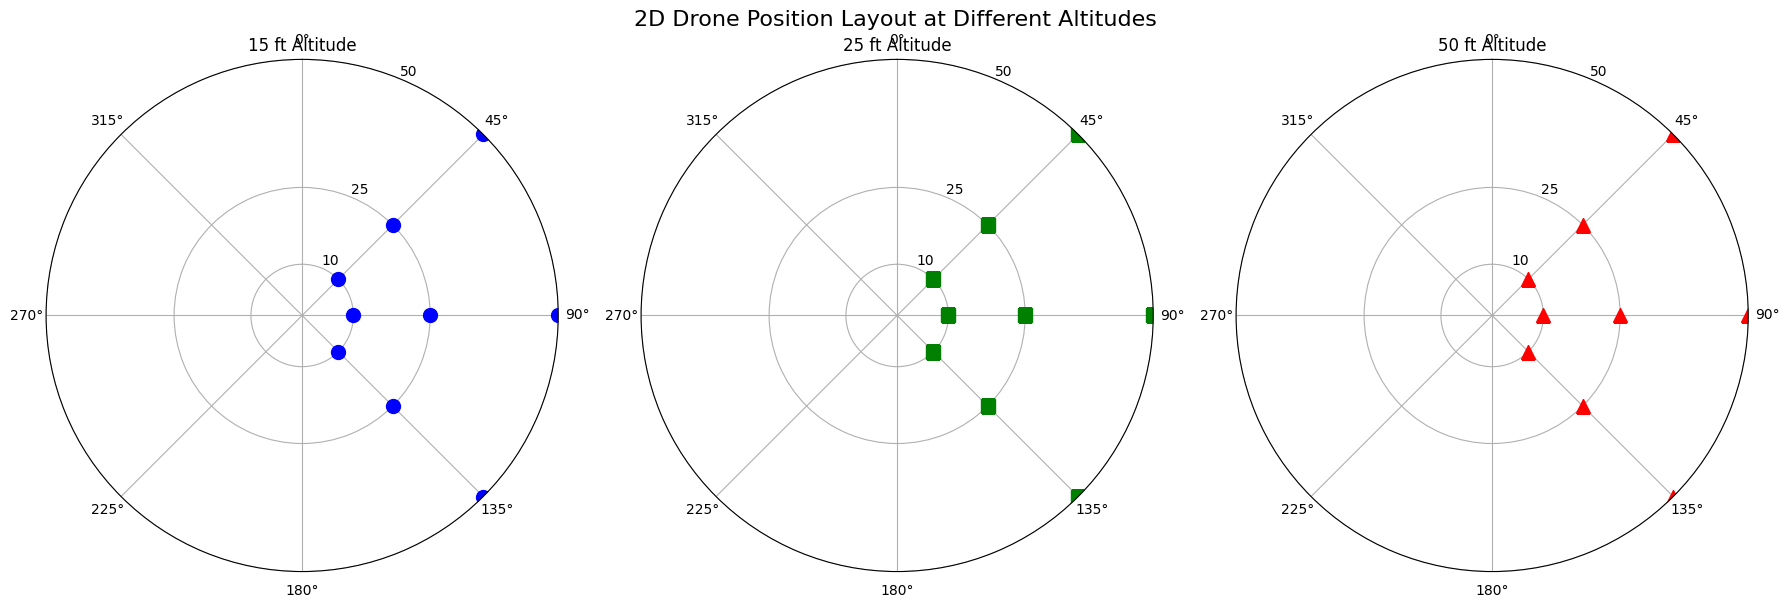

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Setup
distances = [10, 25, 50]
angles_deg = [-45, 0, 45]
altitudes = [15, 25, 50]
colors = {15: 'blue', 25: 'green', 50: 'red'}
markers = {15: 'o', 25: 's', 50: '^'}

# --- 2D Polar Plots ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})

for i, alt in enumerate(altitudes):
    ax = axs[i]
    for r in distances:
        for angle in angles_deg:
            theta = np.deg2rad(angle + 90)
            ax.plot(theta, r, marker=markers[alt], color=colors[alt], markersize=10)
    ax.set_title(f"{alt} ft Altitude")
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rlim(0, 22)
    ax.set_rticks(distances)
    ax.grid(True)

plt.suptitle("2D Drone Position Layout at Different Altitudes", fontsize=16)
plt.tight_layout()
plt.show()




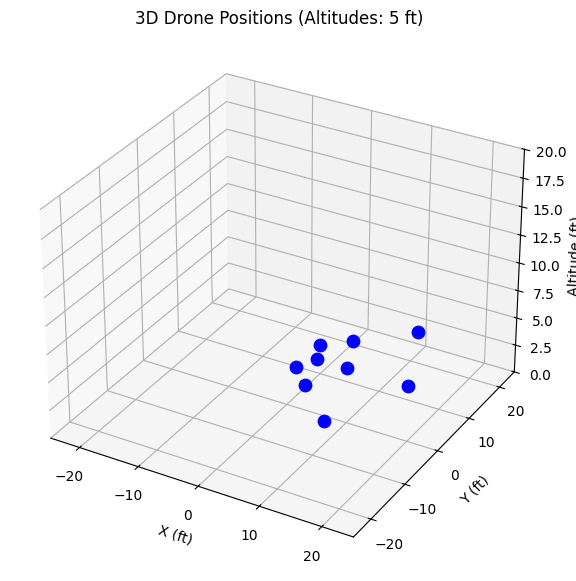

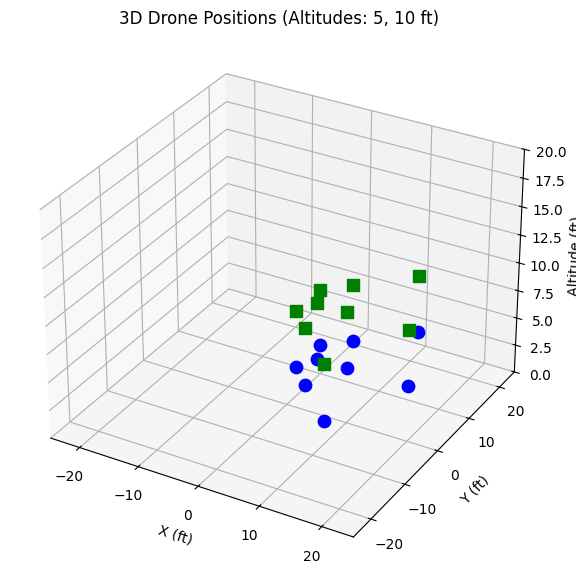

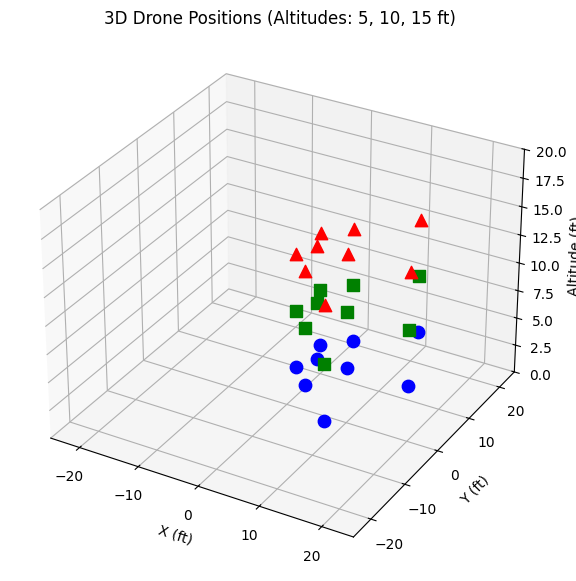

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Setup
distances = [5, 10, 20]
angles_deg = [-45, 0, 45]
altitude_levels = [[5], [5, 10], [5, 10, 15]]
colors = {5: 'blue', 10: 'green', 15: 'red'}
markers = {5: 'o', 10: 's', 15: '^'}

# Generate plots for each set
for idx, altitudes in enumerate(altitude_levels):
    x_vals, y_vals, z_vals, colors_plot, markers_plot = [], [], [], [], []

    for r in distances:
        for angle in angles_deg:
            theta_rad = np.deg2rad(angle)
            for alt in altitudes:
                x_vals.append(r * np.cos(theta_rad))
                y_vals.append(r * np.sin(theta_rad))
                z_vals.append(alt)
                colors_plot.append(colors[alt])
                markers_plot.append(markers[alt])

    # Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for x, y, z, c, m in zip(x_vals, y_vals, z_vals, colors_plot, markers_plot):
        ax.scatter(x, y, z, color=c, marker=m, s=80)

    ax.set_xlabel("X (ft)")
    ax.set_ylabel("Y (ft)")
    ax.set_zlabel("Altitude (ft)")
    ax.set_title(f"3D Drone Positions (Altitudes: {', '.join(map(str, altitudes))} ft)")

    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.set_zlim(0, 20)

    plt.show()


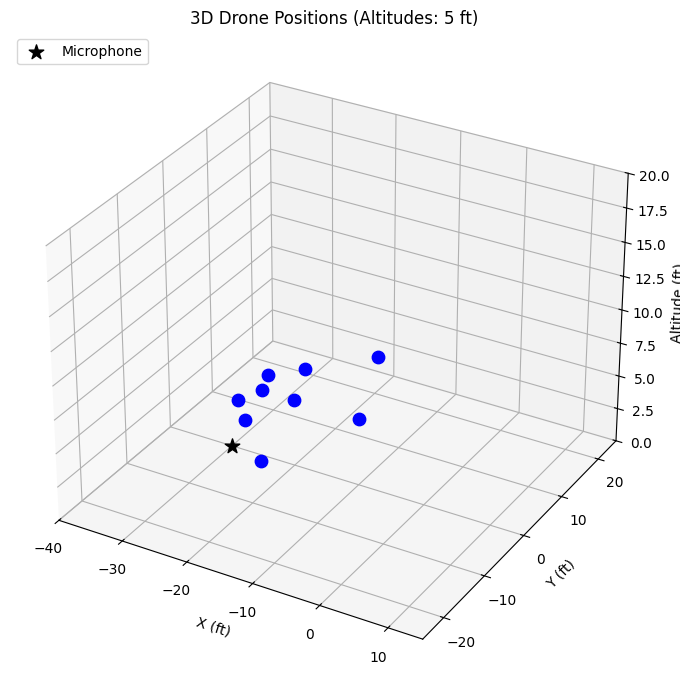

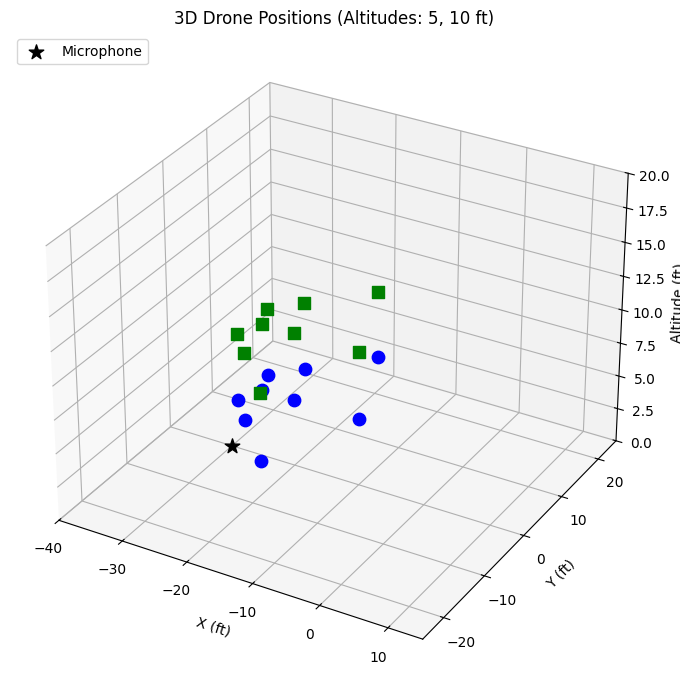

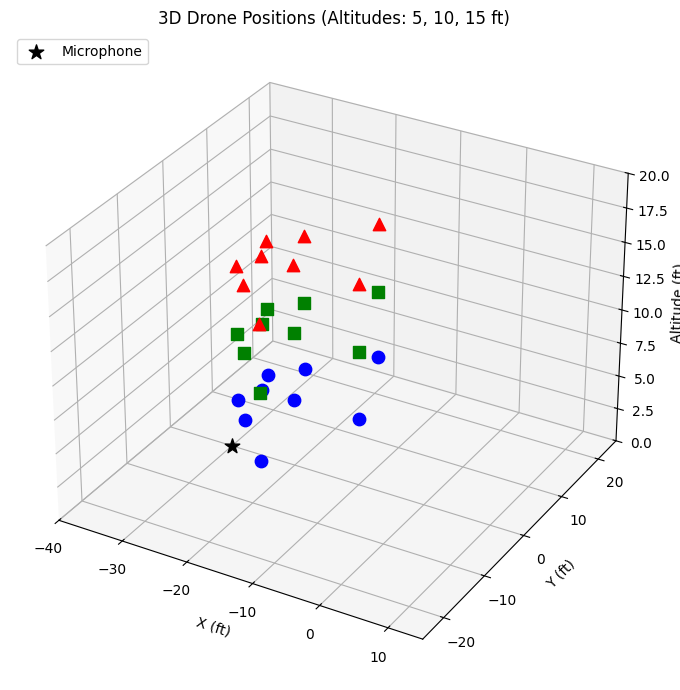

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Setup
distances = [5, 10, 20]
angles_deg = [-45, 0, 45]
altitude_levels = [[5], [5, 10], [5, 10, 15]]
colors = {5: 'blue', 10: 'green', 15: 'red'}
markers = {5: 'o', 10: 's', 15: '^'}

# Offset origin to the left
origin_x, origin_y = -30, 0

# Generate plots
for altitudes in altitude_levels:
    x_vals, y_vals, z_vals = [], [], []
    c_vals, m_vals = [], []

    for r in distances:
        for angle in angles_deg:
            theta_rad = np.deg2rad(angle)
            for z in altitudes:
                x = origin_x + r * np.cos(theta_rad)
                y = origin_y + r * np.sin(theta_rad)
                x_vals.append(x)
                y_vals.append(y)
                z_vals.append(z)
                c_vals.append(colors[z])
                m_vals.append(markers[z])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for x, y, z, c, m in zip(x_vals, y_vals, z_vals, c_vals, m_vals):
        ax.scatter(x, y, z, color=c, marker=m, s=80)

    ax.scatter(origin_x, origin_y, 0, color='black', marker='*', s=120, label='Microphone')

    ax.set_xlabel("X (ft)")
    ax.set_ylabel("Y (ft)")
    ax.set_zlabel("Altitude (ft)")
    ax.set_title(f"3D Drone Positions (Altitudes: {', '.join(map(str, altitudes))} ft)")

    ax.set_xlim(-40, 15)
    ax.set_ylim(-25, 25)
    ax.set_zlim(0, 20)

    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
